<hr>
<h3>ALLLife Bank Credit Card Customer Segmentation</h3>
<hr>

<b>Background</b>: AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

<b>Data Description</b>: Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre. 

<b>Key Questions:</b> 
1. How many different segments of customers are there?
2. How are these segments different from each other?
3. What are your recommendations to the bank on how to better market to and service these customers?

In [3]:
import warnings
warnings.filterwarnings('ignore')
#let us start by importing the relevant libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import fcluster
from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler

In [4]:
pd.options.display.max_columns = None

In [5]:
df = pd.read_excel("Credit Card Customer Data.xlsx")  # Read the data

In [6]:
df.head(5)

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073            100000                   2   
1      2         38414             50000                   3   
2      3         17341             50000                   7   
3      4         40496             30000                   5   
4      5         47437            100000                   6   

   Total_visits_bank  Total_visits_online  Total_calls_made  
0                  1                    1                 0  
1                  0                   10                 9  
2                  1                    3                 4  
3                  1                    1                 4  
4                  0                   12                 3

In [7]:
df.tail(5)

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
655    656         51108             99000                  10   
656    657         60732             84000                  10   
657    658         53834            145000                   8   
658    659         80655            172000                  10   
659    660         80150            167000                   9   

     Total_visits_bank  Total_visits_online  Total_calls_made  
655                  1                   10                 0  
656                  1                   13                 2  
657                  1                    9                 1  
658                  1                   15                 0  
659                  0                   12                 2

In [6]:
prof = ProfileReport(df)
prof

In [8]:
# Check for Missing Values
df.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [9]:
#Check for duplicate rows
df["Customer Key"].duplicated().sum()

5

In [10]:
df[df["Customer Key"]==47437]

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
4        5         47437            100000                   6   
332    333         47437             17000                   7   

     Total_visits_bank  Total_visits_online  Total_calls_made  
4                    0                   12                 3  
332                  3                    1                 0

In [11]:
# Dropping duplicates based on unique customer key
df = df.iloc[df['Customer Key'].drop_duplicates(keep='last').index]
df.shape

(655, 7)

In [12]:
df.describe().T
# Interesting ? - Scaling

count          mean           std      min      25%  \
Sl_No                655.0    331.552672    190.407385      1.0    167.5   
Customer Key         655.0  55058.158779  25606.965469  11265.0  33623.5   
Avg_Credit_Limit     655.0  34563.358779  37648.200947   3000.0  10000.0   
Total_Credit_Cards   655.0      4.711450      2.172410      1.0      3.0   
Total_visits_bank    655.0      2.404580      1.625385      0.0      1.0   
Total_visits_online  655.0      2.601527      2.920192      0.0      1.0   
Total_calls_made     655.0      3.575573      2.855867      0.0      1.0   

                         50%      75%       max  
Sl_No                  331.0    496.5     660.0  
Customer Key         53898.0  77084.5   99843.0  
Avg_Credit_Limit     18000.0  48000.0  200000.0  
Total_Credit_Cards       5.0      6.0      10.0  
Total_visits_bank        2.0      4.0       5.0  
Total_visits_online      2.0      4.0      15.0  
Total_calls_made         3.0      5.0      10.0

In [13]:
# Drop Key Columns
df.drop(columns=["Sl_No","Customer Key"],inplace=True)

In [14]:
# Numerical  - 'Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank','Total_visits_online', 'Total_calls_made'

## Univariate Analysis

In [15]:
df.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [16]:
df.head(5)

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0            100000                   2                  1   
1             50000                   3                  0   
2             50000                   7                  1   
3             30000                   5                  1   
5             20000                   3                  0   

   Total_visits_online  Total_calls_made  
0                    1                 0  
1                   10                 9  
2                    3                 4  
3                    1                 4  
5                    1                 8

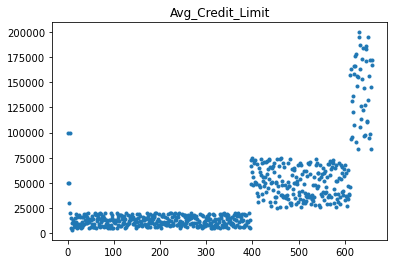

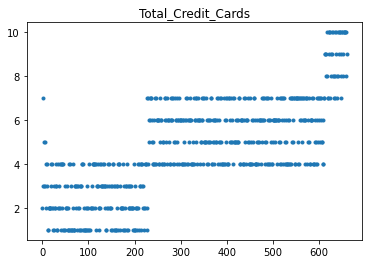

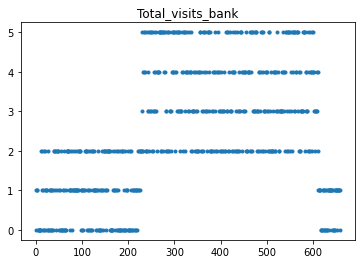

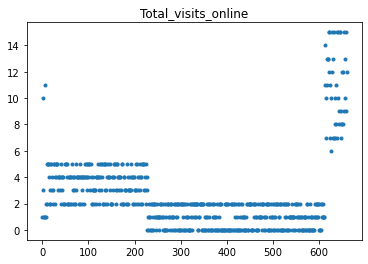

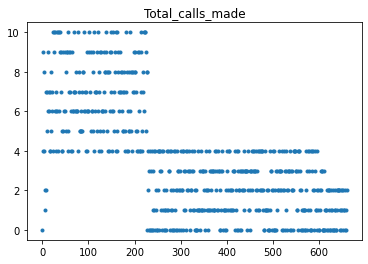

In [17]:
for i,col in enumerate(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank','Total_visits_online', 'Total_calls_made']):
    plt.plot(df[col],'.')
    plt.title(col)
    plt.show()
# Insights - Make sure you dont get ordered data from source or randomize while ingestion

In [18]:
df.skew()

Avg_Credit_Limit       2.209182
Total_Credit_Cards     0.140402
Total_visits_bank      0.140206
Total_visits_online    2.234473
Total_calls_made       0.658983
dtype: float64

In [19]:
df.kurt()

Avg_Credit_Limit       5.164541
Total_Credit_Cards    -0.377249
Total_visits_bank     -1.095285
Total_visits_online    5.842903
Total_calls_made      -0.510633
dtype: float64

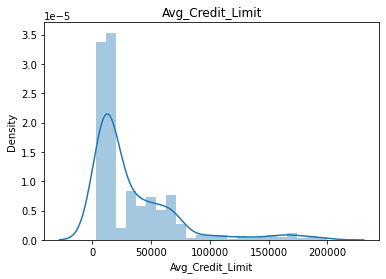

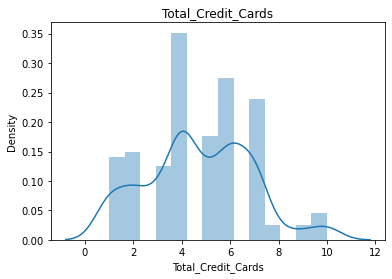

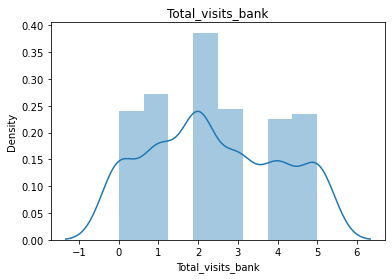

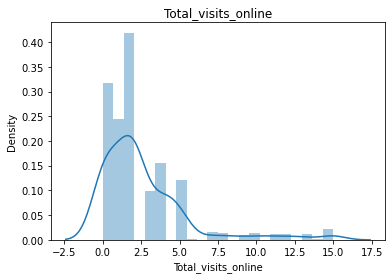

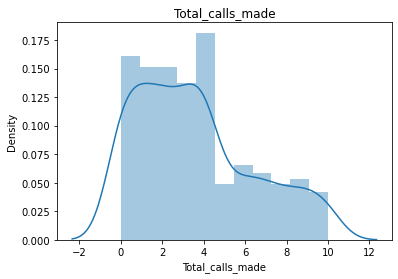

In [20]:
for i,col in enumerate(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank','Total_visits_online', 'Total_calls_made']):
    sns.distplot(df[col])
    plt.title(col)
    plt.show()
# Interesting - 2 -3 clusters

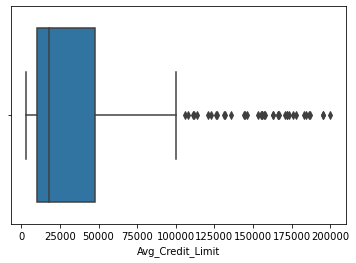

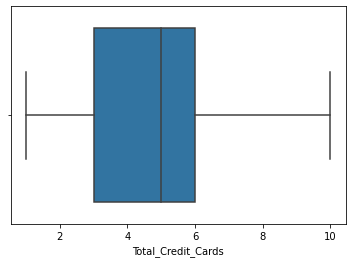

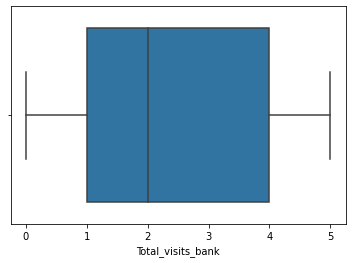

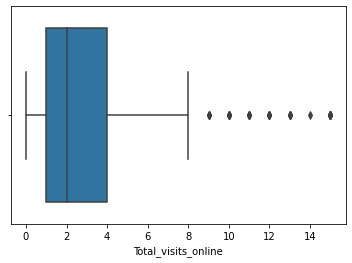

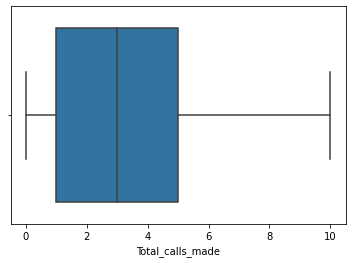

In [21]:
for i,col in enumerate(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank','Total_visits_online', 'Total_calls_made']):
    sns.boxplot(df[col])
    plt.show()

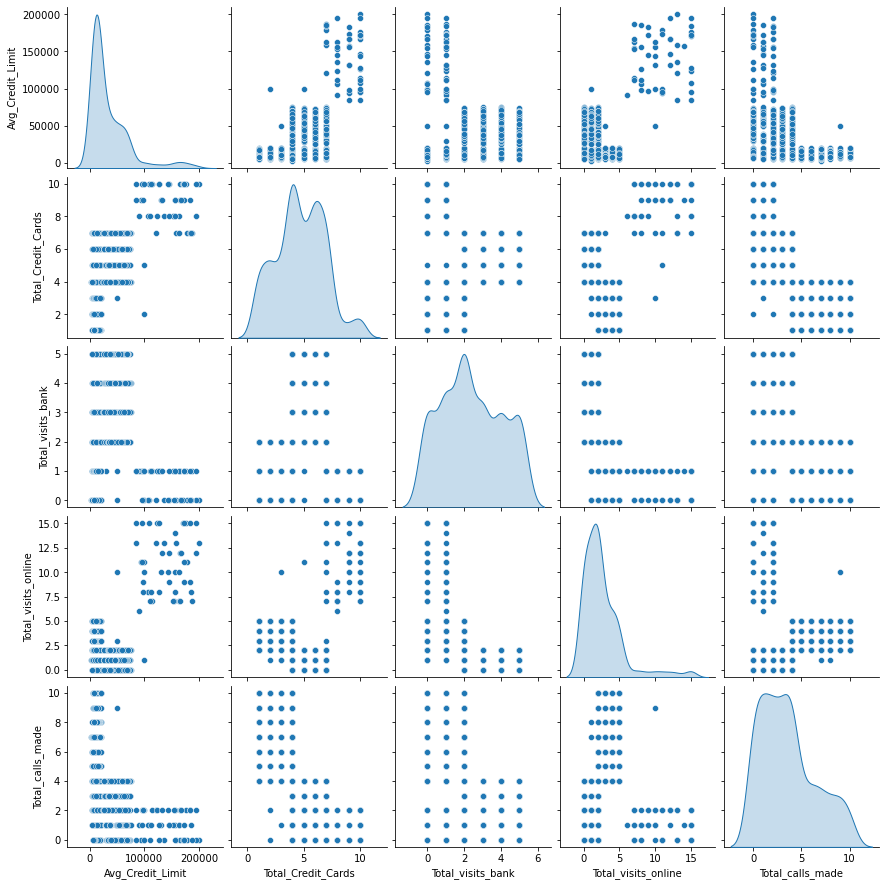

In [22]:
sns.pairplot(data= df,diag_kind="kde")

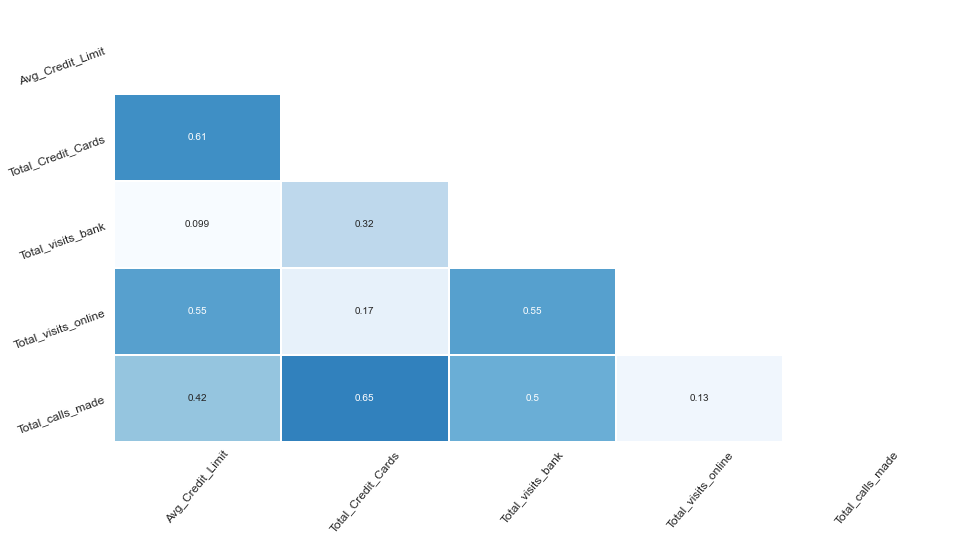

In [24]:
corr = abs(df.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,8))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
plt.xticks(rotation = 50,fontsize=12)   # Aesthetic purposes
plt.yticks(rotation = 20,fontsize=12)   # Aesthetic purposes
plt.show()

## Modelling

In [25]:
df_train = df.sample(frac=0.9,random_state=200)
df_test=df.drop(df_train.index)

In [26]:
print(df_train.shape)
print(df_test.shape)

(590, 5)
(65, 5)


In [27]:
# Scaling the data
trans = StandardScaler()
df_train_z = trans.fit_transform(df_train)
df_train_z = pd.DataFrame(df_train_z,columns=df.columns)

In [28]:
df_train_z.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [29]:
df_train_z.describe().T

count          mean       std       min       25%  \
Avg_Credit_Limit     590.0 -5.776923e-17  1.000849 -0.847832 -0.651630   
Total_Credit_Cards   590.0  1.435293e-16  1.000849 -1.716818 -0.791352   
Total_visits_bank    590.0  5.268855e-17  1.000849 -1.498271 -0.882257   
Total_visits_online  590.0  4.694926e-17  1.000849 -0.888860 -0.541557   
Total_calls_made     590.0  7.188224e-17  1.000849 -1.251462 -0.898516   

                          50%       75%       max  
Avg_Credit_Limit    -0.441896  0.390271  4.483453  
Total_Credit_Cards   0.134114  0.596847  2.447780  
Total_visits_bank   -0.266243  0.965784  1.581798  
Total_visits_online -0.194254  0.500352  4.320683  
Total_calls_made    -0.192625  0.513267  2.277996

In [30]:
# Calculate Principal Component Analysis
pca = PCA(n_components=2)
pca.fit(df_train_z)

PCA(n_components=2)

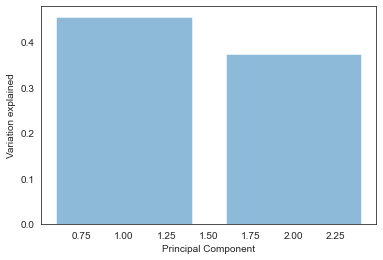

[0.45511531 0.37275332]


In [31]:
plt.bar(list(range(1,3)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('Principal Component')
plt.show()
print(pca.explained_variance_ratio_) # 82% explained

In [32]:
# Transform X to PC1 & PC2
df_train_z_pca2 = pca.transform(df_train_z)

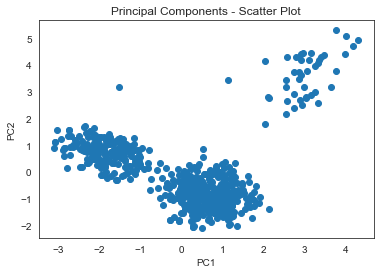

In [34]:
# Plots Clusters via PCA
plt.scatter(df_train_z_pca2[:,0], df_train_z_pca2[:,1])
plt.title('Principal Components - Scatter Plot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
# Some sort of idea to look for 3 clusters

## K Means

2 1.4614365137807168 0.4165942206998458
3 1.16104879098449 0.5110348370414939
4 1.05669096165332 0.3532070796607623
5 1.0046497259618539 0.2677749006482147
6 0.9552157541987122 0.2524892323020241
7 0.919053665605623 0.24624474729696044
8 0.897846545454119 0.22664014300162091
9 0.8713074907599596 0.22161862701109333


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

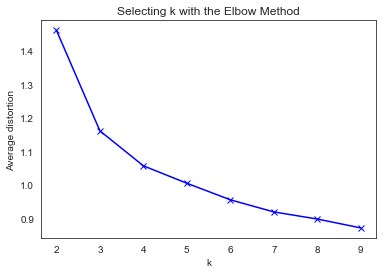

In [35]:
#Finding optimal no. of clusters - Elblow Method
from scipy.spatial.distance import cdist
clusters=range(2,10)
meanDistortions=[]
meanslh_score = []

for k in clusters:
    model=KMeans(n_clusters=k, init='k-means++',random_state=2345)
    model.fit(df_train_z)
    prediction=model.predict(df_train_z)
    distortion=sum(np.min(cdist(df_train_z, model.cluster_centers_, 'euclidean'), axis=1)) / df_train_z.shape[0]
    meanDistortions.append(sum(np.min(cdist(df_train_z, model.cluster_centers_, 'euclidean'), axis=1)) / df_train_z
                           .shape[0])
    slh_score = metrics.silhouette_score(df_train_z, model.labels_, metric='euclidean')
    meanslh_score.append(slh_score)
    print(k,distortion,slh_score)


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

# Elbow method and euclidean distance Qn - How many clusters would you guys choose ?
# Scale for X axis important to figure out what range look for clusters

2 1.4614365137807168 0.4165942206998458
27 0.6293402487187804 0.23512585526352892
52 0.5111566369775457 0.2200719335463751
77 0.4344563918022028 0.23675435389506513
102 0.3801543559796681 0.25731508792295277
127 0.33253134286030467 0.2747330160277406
152 0.29289905413734346 0.28954110383776244
177 0.2633987428996585 0.28826756260943776
202 0.23364221556588466 0.28961667823693554
227 0.2088906883173808 0.2945580065142987
252 0.18447534822352976 0.2936275241298636
277 0.16173779650797593 0.29188813128673163
302 0.1413046420260199 0.2881589208510577
327 0.1217904960019682 0.28785302854229067
352 0.10338561642988436 0.2777127404737759
377 0.08543314251884171 0.27479063210558197
402 0.0685103791820536 0.26679385373593
427 0.053377455856446106 0.2518071504475237
452 0.037020289192018906 0.24814910443124613
477 0.02218502014337771 0.2428573285149249
502 0.012323312360828722 0.2148990520510274
527 0.005336024831177698 0.17199169117794944


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

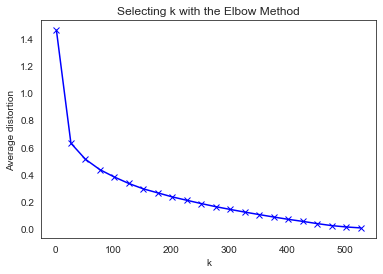

In [36]:
#Finding optimal no. of clusters - Elblow Method
from scipy.spatial.distance import cdist
clusters=range(2,550,25)
meanDistortions=[]
meanslh_score_1 = []

for k in clusters:
    model=KMeans(n_clusters=k, init='k-means++',random_state=2345)
    model.fit(df_train_z)
    prediction=model.predict(df_train_z)
    distortion=sum(np.min(cdist(df_train_z, model.cluster_centers_, 'euclidean'), axis=1)) / df_train_z.shape[0]
    meanDistortions.append(sum(np.min(cdist(df_train_z, model.cluster_centers_, 'euclidean'), axis=1)) / df_train_z.shape[0])
    slh_score = metrics.silhouette_score(df_train_z, model.labels_, metric='euclidean')
    meanslh_score_1.append(slh_score)
    print(k,distortion,slh_score)


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

Text(0.5, 1.0, 'Selecting k with the Silhouette Score')

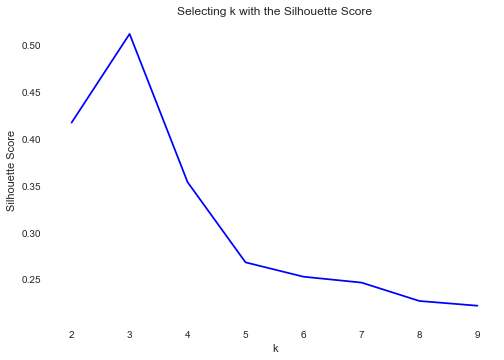

In [36]:
clusters=range(2,10)
plt.plot(clusters, meanslh_score, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Selecting k with the Silhouette Score')
# See where get max Silhoutte Score but important that scale of X axis is seen

Text(0.5, 1.0, 'Selecting k with the Silhouette Score')

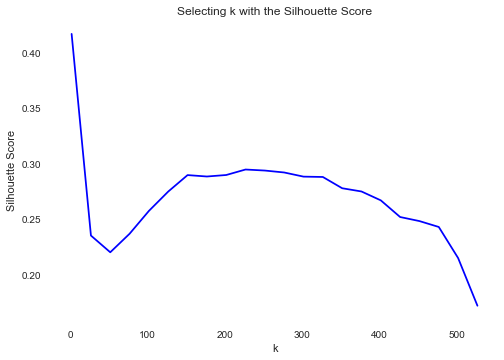

In [37]:
clusters=range(2,550,25)
plt.plot(clusters, meanslh_score_1, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Selecting k with the Silhouette Score')

In [38]:
#Set the value of k=3 - as a starting pt
kmeans = KMeans(n_clusters=3, n_init = 15, init='k-means++',random_state=2345)
kmeans.fit(df_train_z)

KMeans(n_clusters=3, n_init=15, random_state=2345)

In [39]:
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(df_train_z) )
centroid_df
#'Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank','Total_visits_online', 'Total_calls_made'

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0         -0.598333           -1.074658          -0.901115   
1         -0.016454            0.370095           0.644615   
2          2.861600            1.877434          -1.154449   

   Total_visits_online  Total_calls_made  
0             0.349736          1.168738  
1            -0.545515         -0.540543  
2             2.858780         -0.914932

In [40]:
## creating a new dataframe only for labels and converting it into categorical variable
df_train_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
df_train_labels['labels'] = df_train_labels['labels'].astype('category')
df_train_labels.head(5)

labels
0      0
1      1
2      0
3      1
4      1

In [41]:
# Joining the label dataframe with the data frame.
df_train.reset_index(inplace=True,drop=True)
df_train_labeled = df_train.join(df_train_labels)
df_train_labeled.head(5)

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0             18000                   1                  2   
1             10000                   6                  4   
2             16000                   4                  1   
3             65000                   4                  3   
4             50000                   5                  4   

   Total_visits_online  Total_calls_made labels  
0                    2                 9      0  
1                    2                 3      1  
2                    4                 6      0  
3                    0                 0      1  
4                    0                 1      1

In [42]:
df_train_labeled['labels'].value_counts()

1    351
0    196
2     43
Name: labels, dtype: int64

In [43]:
# Distance between centroids and data points - lower the better
print("Cluster Distances",sum(np.min(cdist(df_train_z, kmeans.cluster_centers_, 'euclidean'), axis=1)))
# Score - lower values are better

Cluster Distances 685.0187866808491


In [44]:
# Calculate Silhouette Coefficient
metrics.silhouette_score(df_train_z, df_train_labeled["labels"], metric='euclidean')

0.5110348370414939

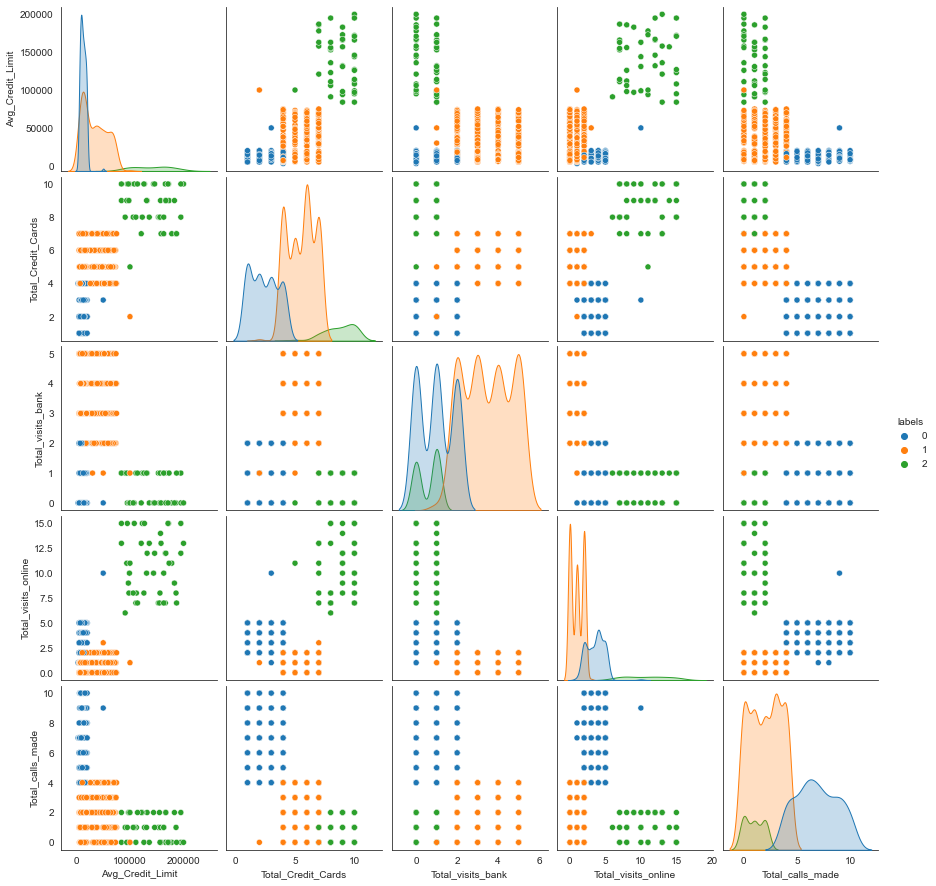

In [45]:
# One way of visualizing clusters via pair plot - Not the best options due to # of dimensions
sns.pairplot(df_train_labeled,diag_kind='kde',hue='labels')

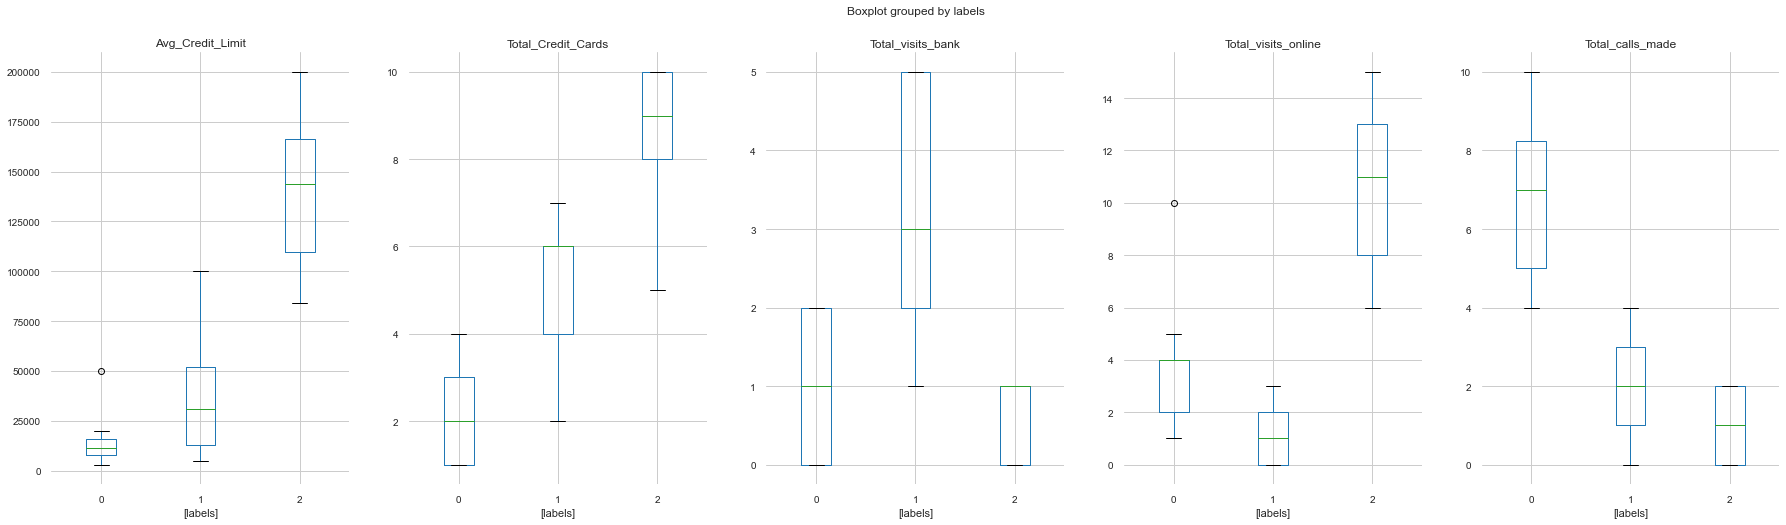

In [46]:
fig, axs = plt.subplots(ncols = 5, figsize = (30, 8))
df_train_labeled[["Avg_Credit_Limit", 'labels']].boxplot(by = 'labels',  layout=(2,4), figsize=(20, 15), ax = axs[0])
df_train_labeled[["Total_Credit_Cards", 'labels']].boxplot(by = 'labels',  layout=(2,4), figsize=(20, 15), ax = axs[1])
df_train_labeled[["Total_visits_bank", 'labels']].boxplot(by = 'labels',  layout=(2,4), figsize=(20, 15), ax = axs[2])
df_train_labeled[["Total_visits_online", 'labels']].boxplot(by = 'labels',  layout=(2,4), figsize=(20, 15), ax = axs[3])
df_train_labeled[["Total_calls_made", 'labels']].boxplot(by = 'labels',  layout=(2,4), figsize=(20, 15), ax = axs[4])
plt.show()
# Explain different features for each cluster based on visual below

In [48]:
# Get Eigen Vector Equations
pca.components_
#PC1 = 0.48644388 * Avg_Credit_Limit +  0.59724396 * Total_Credit_Cards +  0.27829803 * Total_visits_bank  +  0.10237766 * Total_visits_online - 0.56457154 * Total_calls_made
#PC2 = 0.40392991 * Avg_Credit_Limit +  0.03331445 * Total_Credit_Cards - 0.58901436 *Total_visits_bank  - 0.66569473 * Total_visits_online + 0.21364311 * Total_calls_made

array([[ 0.48644388,  0.59724396,  0.27829803,  0.10237766, -0.56457154],
       [ 0.40392991,  0.03331445, -0.58901436,  0.66569473,  0.21364311]])

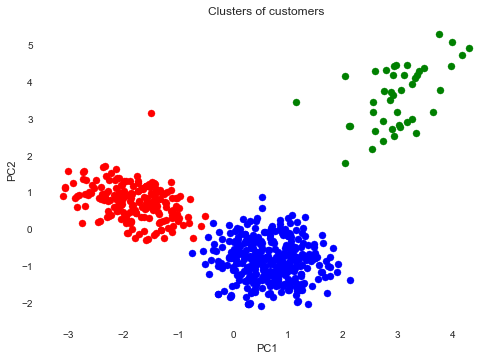

In [49]:
# Plot Clusters via PCA
plt.scatter(df_train_z_pca2[df_train_labels["labels"] == 0, 0], df_train_z_pca2[df_train_labels["labels"] == 0, 1], s = 50, c = 'red')
plt.scatter(df_train_z_pca2[df_train_labels["labels"] == 1, 0], df_train_z_pca2[df_train_labels["labels"] == 1, 1], s = 50, c = 'blue')
plt.scatter(df_train_z_pca2[df_train_labels["labels"] == 2, 0], df_train_z_pca2[df_train_labels["labels"] == 2, 1], s = 50, c = 'green')
plt.title('Clusters of customers')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
# Good Seperation between Clusters

In [51]:
# Play with 4 Clusters
kmeans_4 = KMeans(n_clusters=4, n_init = 15, init='k-means++',random_state=2345)
kmeans_4.fit(df_train_z)
df_train_labels_4 = pd.DataFrame(kmeans_4.labels_ , columns = list(['labels']))
df_train_labels_4['labels'] = df_train_labels_4['labels'].astype('category')
# Joining the label dataframe with the data frame.
df_train_labeled_4 = df_train.join(df_train_labels_4)
df_train_labeled_4.head(5)
print(df_train_labeled_4['labels'].value_counts())
# Calculate Silhouette Coefficient
print(metrics.silhouette_score(df_train_z, df_train_labeled_4["labels"], metric='euclidean'))

1    194
0    181
3    172
2     43
Name: labels, dtype: int64
0.3532070796607623


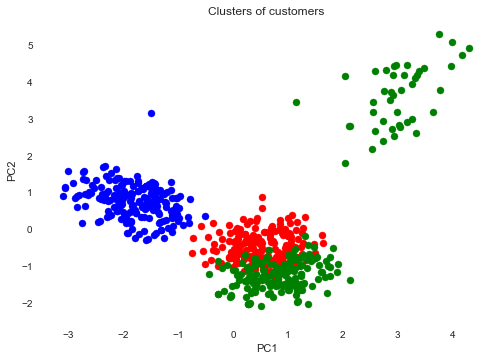

In [52]:
# Plot Clusters via PCA
plt.scatter(df_train_z_pca2[df_train_labels_4["labels"] == 0, 0], df_train_z_pca2[df_train_labels_4["labels"] == 0, 1], s = 50, c = 'red')
plt.scatter(df_train_z_pca2[df_train_labels_4["labels"] == 1, 0], df_train_z_pca2[df_train_labels_4["labels"] == 1, 1], s = 50, c = 'blue')
plt.scatter(df_train_z_pca2[df_train_labels_4["labels"] == 2, 0], df_train_z_pca2[df_train_labels_4["labels"] == 2, 1], s = 50, c = 'green')
plt.scatter(df_train_z_pca2[df_train_labels_4["labels"] == 3, 0], df_train_z_pca2[df_train_labels_4["labels"] == 3, 1], s = 50, c = 'green')
plt.title('Clusters of customers')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
# Not that perfect seperation as 4 Clusters

## Hierarchial Clustering

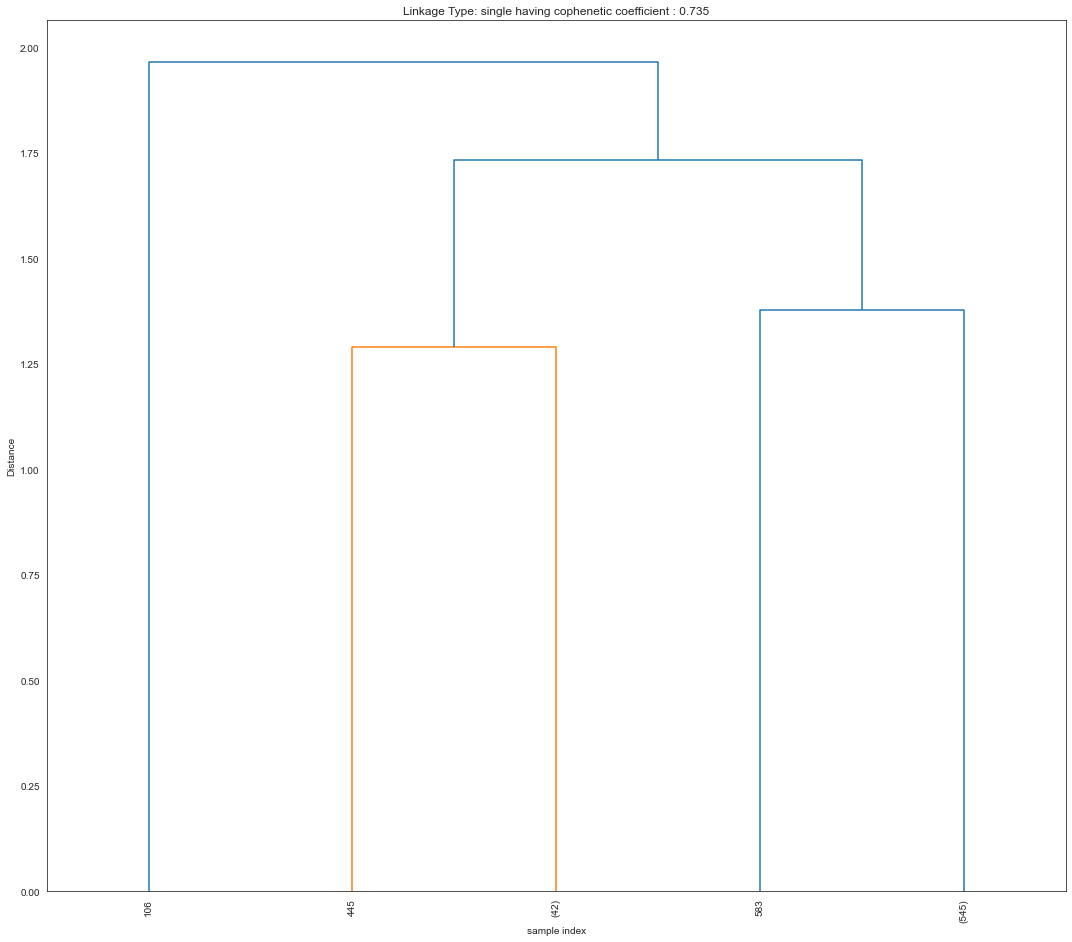

single 0.7347576783434111


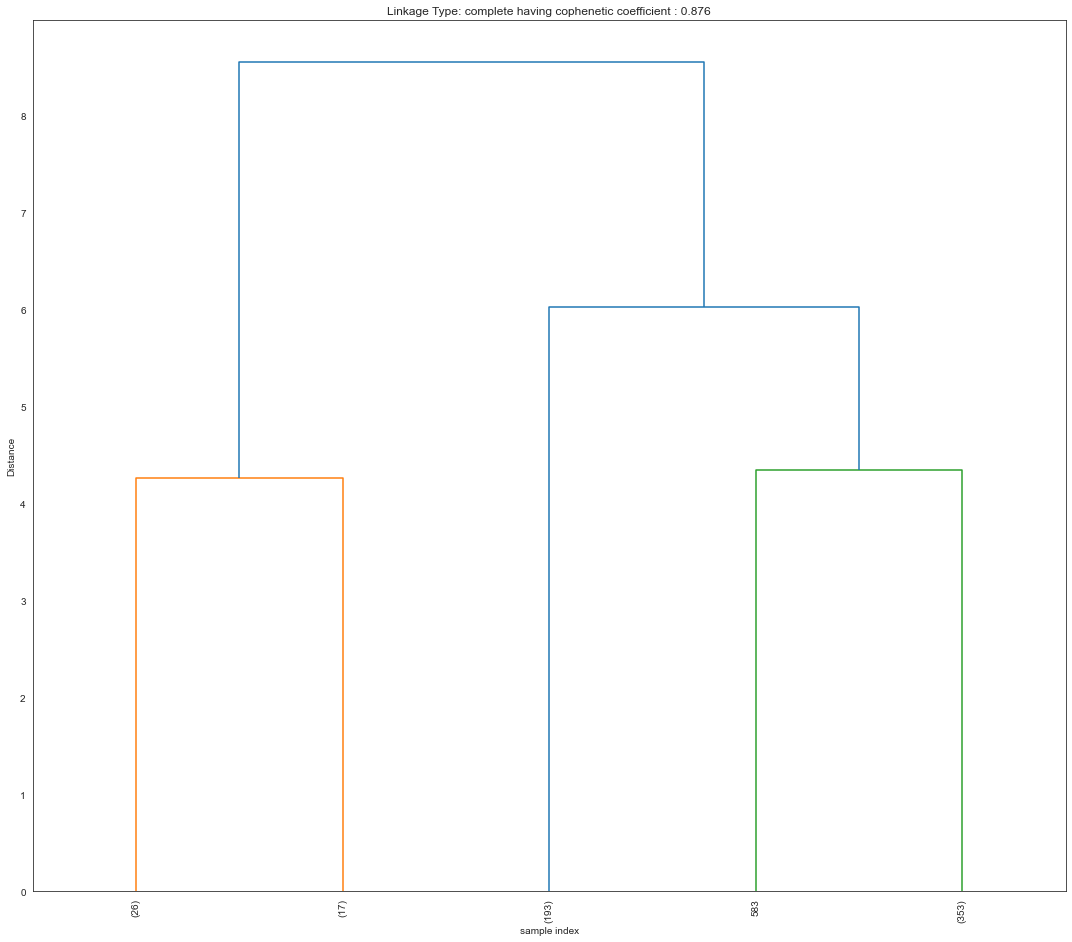

complete 0.8763137917764757


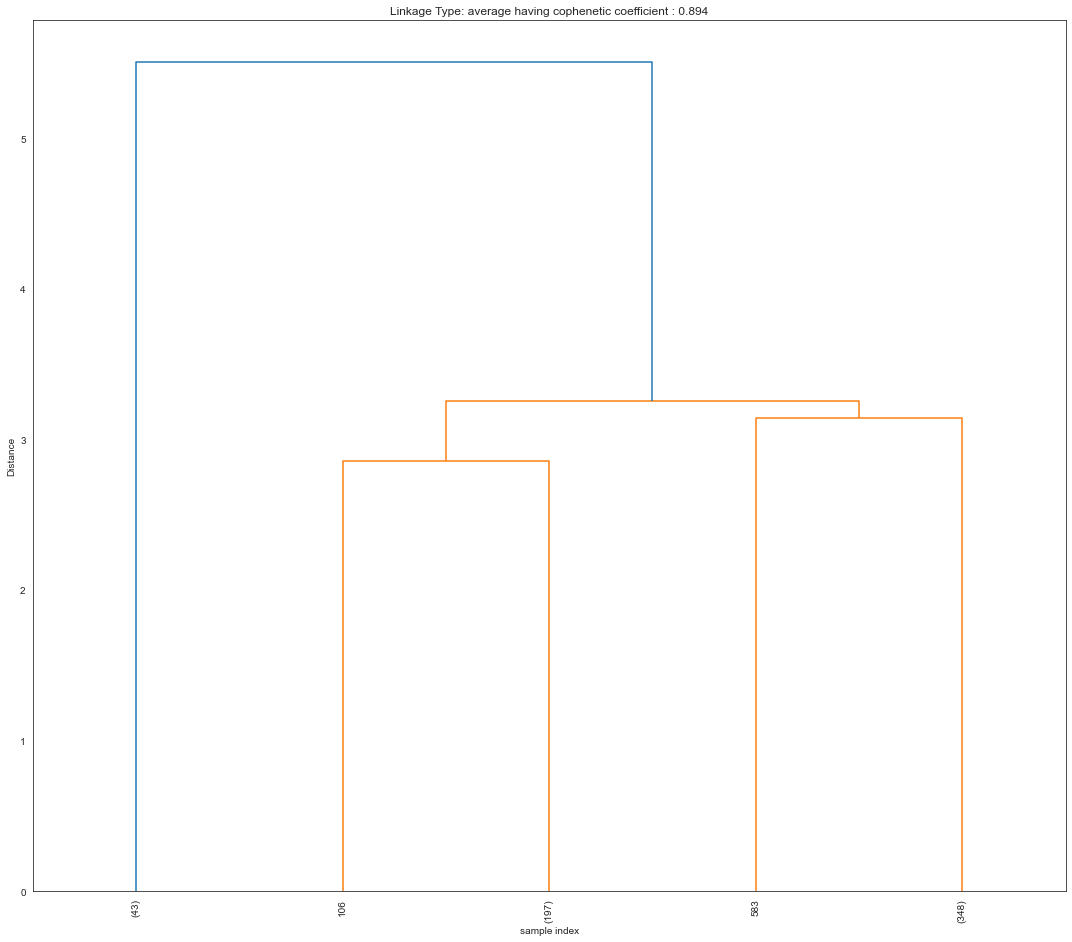

average 0.8940802401999857


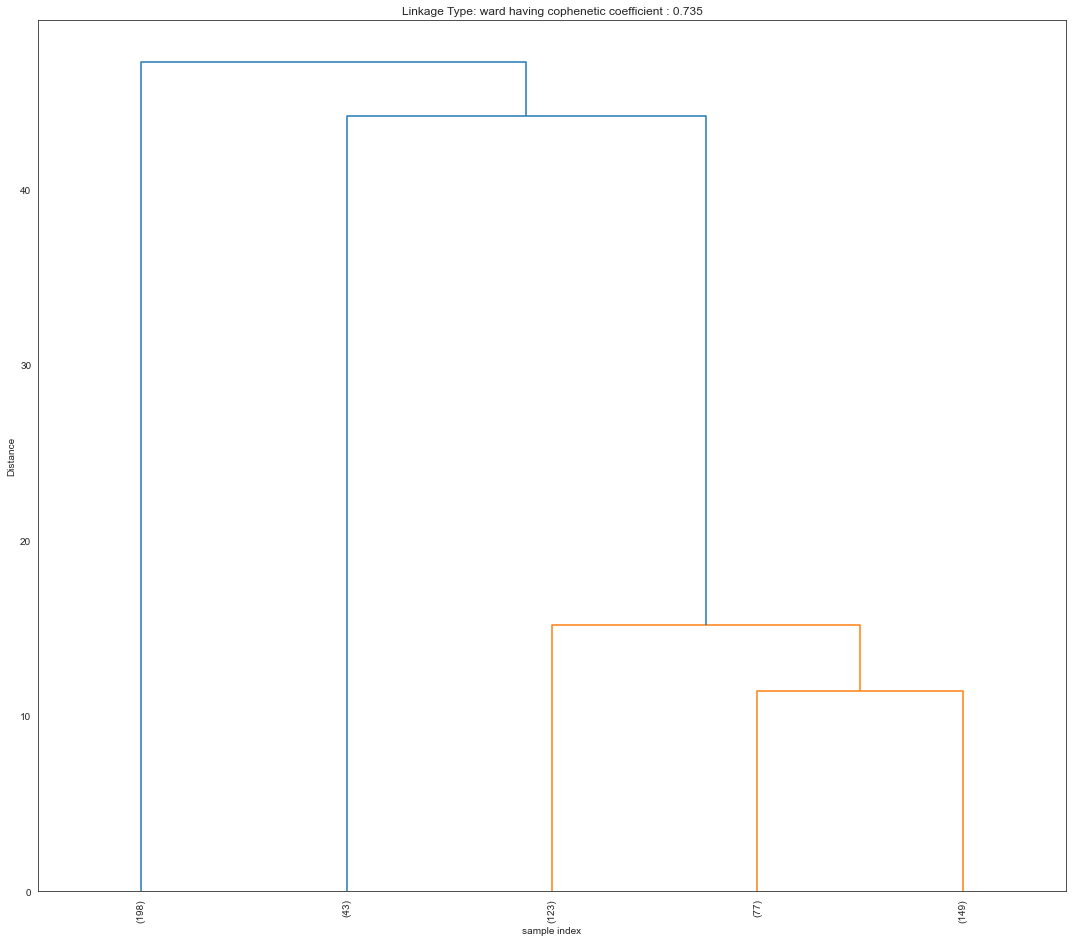

ward 0.7354350312302139


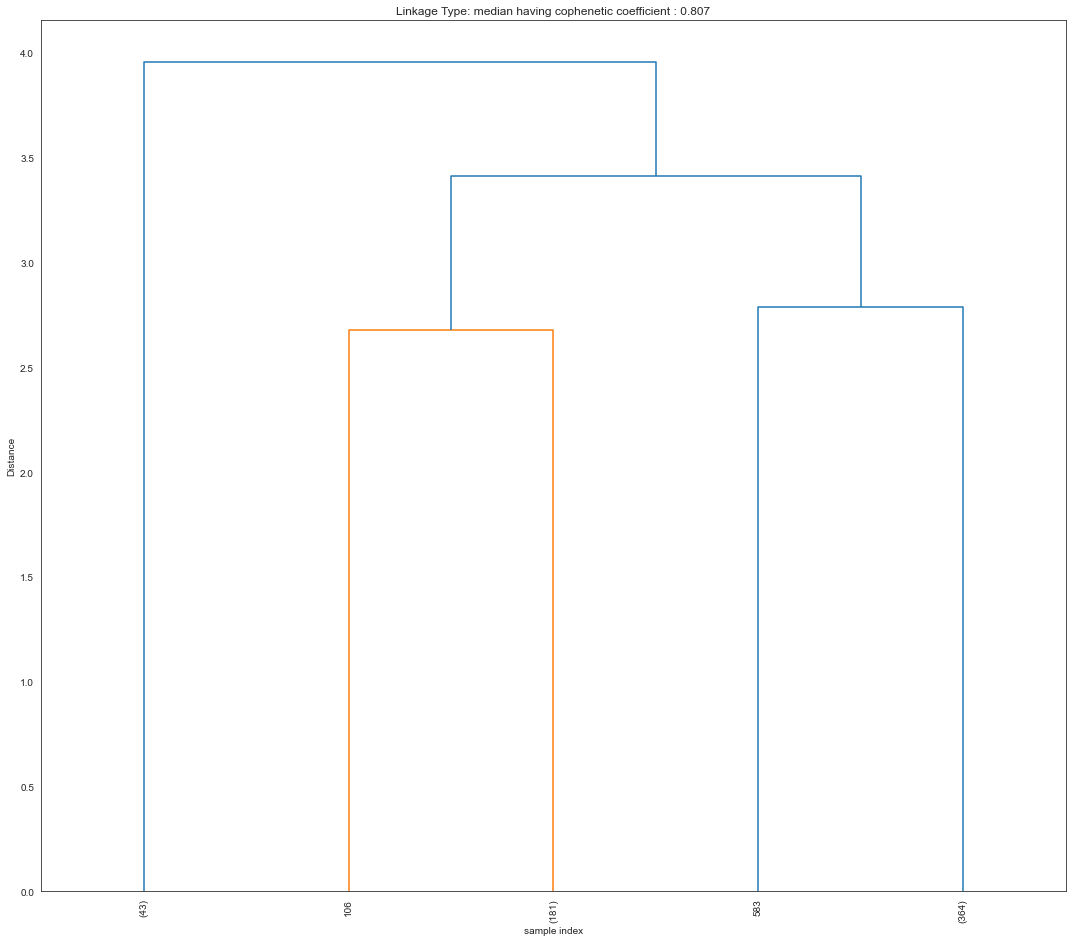

median 0.8070823496341534


In [47]:
#### generate the linkage matrix with all linkage methods
linkage_methods=['single','complete','average','ward','median']
results_cophenetic_coef=[]
for i in linkage_methods :
    plt.figure(figsize=(15, 13))
    plt.xlabel('sample index')
    plt.ylabel('Distance')
    Z = linkage(df_train_z, i, metric='euclidean')
    cc,cophn_dist=cophenet(Z,pdist(df_train_z))
    dendrogram(Z,leaf_rotation=90.0,p=5,leaf_font_size=10,truncate_mode='lastp')
    plt.tight_layout()
    plt.title("Linkage Type: "+ i +" having cophenetic coefficient : "+str(round(cc,3)) )
    plt.show()
    results_cophenetic_coef.append((i,cc))
    print (i,cc)

In [48]:
results_cophenetic_coef_df=pd.DataFrame(results_cophenetic_coef,columns=['LinkageMethod','CopheneticCoefficient'])
results_cophenetic_coef_df
# Use Complete Method as CopheneticCoefficient high and cluster seperation from Dendogram looks good

LinkageMethod  CopheneticCoefficient
0        single               0.734758
1      complete               0.876314
2       average               0.894080
3          ward               0.735435
4        median               0.807082

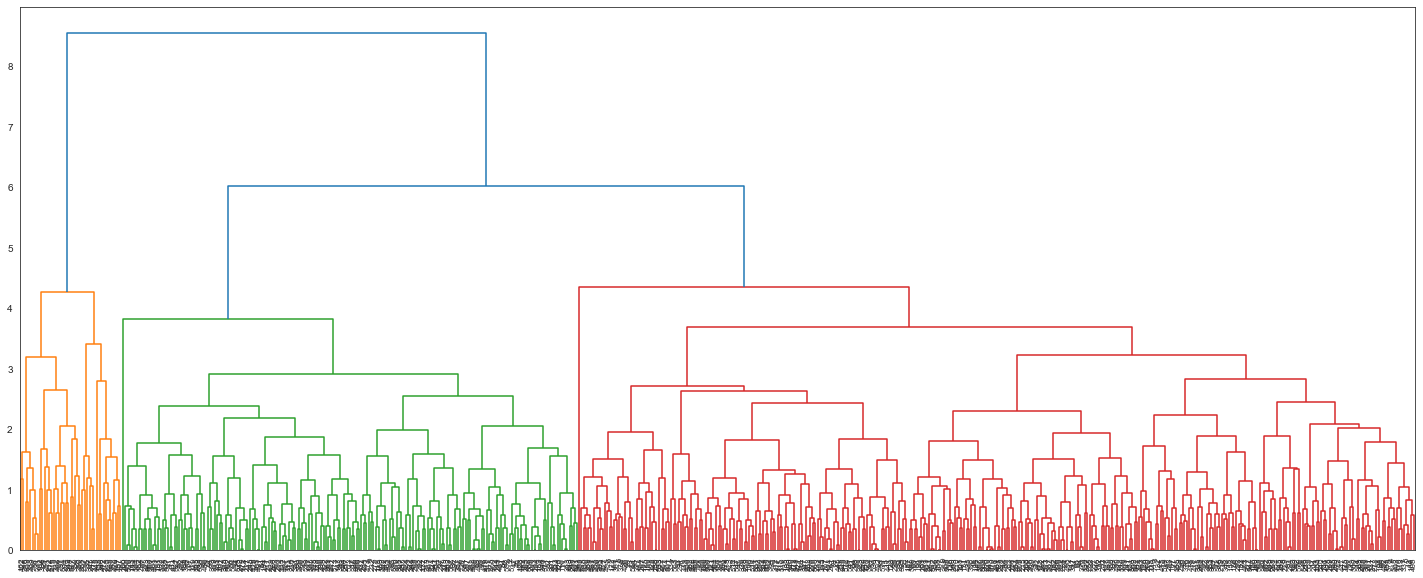

In [49]:
Z = linkage(df_train_z, 'complete', metric='euclidean')
plt.figure(figsize=(25, 10))
dendrogram(Z,
           leaf_rotation=90.,  # rotates the x axis labels
           leaf_font_size=8.)
plt.show()

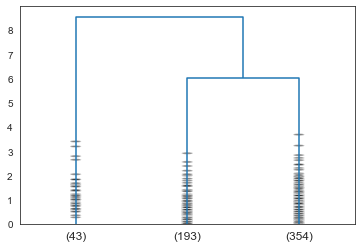

In [50]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
    show_leaf_counts=True,
    show_contracted = True
)
plt.show()

In [51]:
from scipy.cluster.hierarchy import cophenet
# Calculate Cophenetic Coefficient
c, coph_dists = cophenet(Z , pdist(df_train_z))

c

0.8763137917764757

In [54]:
# Different values for Metric and Distance and calculate Cophenetic Coefficient - Try against distance measure as well
Z1 = linkage(df_train_z, method = 'average', metric='mahalanobis')
Z1.shape
c, coph_dists = cophenet(Z1 , pdist(df_train_z))

c

0.8209772311296631

In [55]:
Z1

array([[1.00000000e+00, 4.92000000e+02, 0.00000000e+00, 2.00000000e+00],
       [1.60000000e+02, 4.83000000e+02, 0.00000000e+00, 2.00000000e+00],
       [2.40000000e+01, 4.90000000e+02, 0.00000000e+00, 2.00000000e+00],
       ...,
       [1.16200000e+03, 1.17500000e+03, 3.99711295e+00, 4.30000000e+01],
       [1.17400000e+03, 1.17600000e+03, 4.62778717e+00, 5.89000000e+02],
       [5.83000000e+02, 1.17700000e+03, 5.21536988e+00, 5.90000000e+02]])

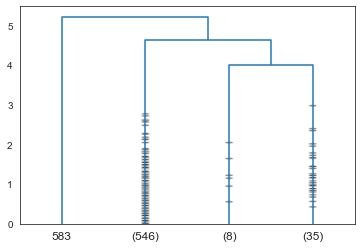

In [56]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z1,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=4,  # show only the last p merged clusters
    show_leaf_counts=True,
    show_contracted = True
)
plt.show()
# Pt 583 looks like an outlier

Text(0, 0.5, 'Distance')

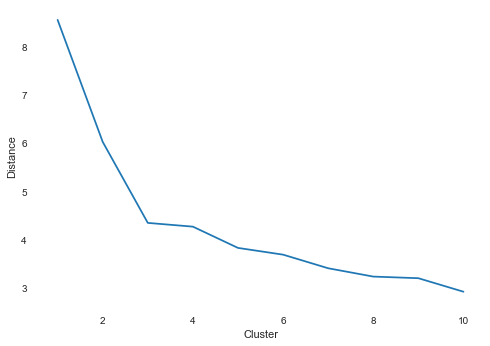

In [67]:
# Elbow Method to figure out Number of Clusters based on distance measure
last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)
plt.xlabel('Cluster')
plt.ylabel('Distance')

In [68]:
# Alternate way of Clustering
from sklearn.cluster import AgglomerativeClustering
hclust = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='complete')
hclust.fit(df_train_z)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [69]:
# Flat Clustering with # of Clusters
k=3
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 1, 2, 3, 1, 3, 2, 3, 3, 2, 2, 1, 3, 3, 3, 3, 3, 2, 2, 2,
       2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 1, 2, 3, 2, 2, 3, 2, 2, 3, 3,
       3, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 3, 2, 3, 1, 3, 3, 3, 2, 1, 3, 3, 3, 2, 3, 3, 3,
       2, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 2, 3,
       2, 3, 3, 3, 3, 2, 3, 3, 1, 3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 2, 2, 3, 2, 3, 3, 1,
       2, 3, 3, 3, 3, 3, 1, 3, 3, 3, 2, 3, 3, 2, 1, 2, 2, 3, 1, 3, 3, 3,
       1, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 2, 2, 3, 2, 3,
       2, 2, 3, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 3,
       3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 1, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 1,
       3, 2, 3, 3, 2, 3, 3, 3, 3, 2, 3, 1, 2, 2, 2,

In [70]:
df_train_z["hcluster"] = clusters

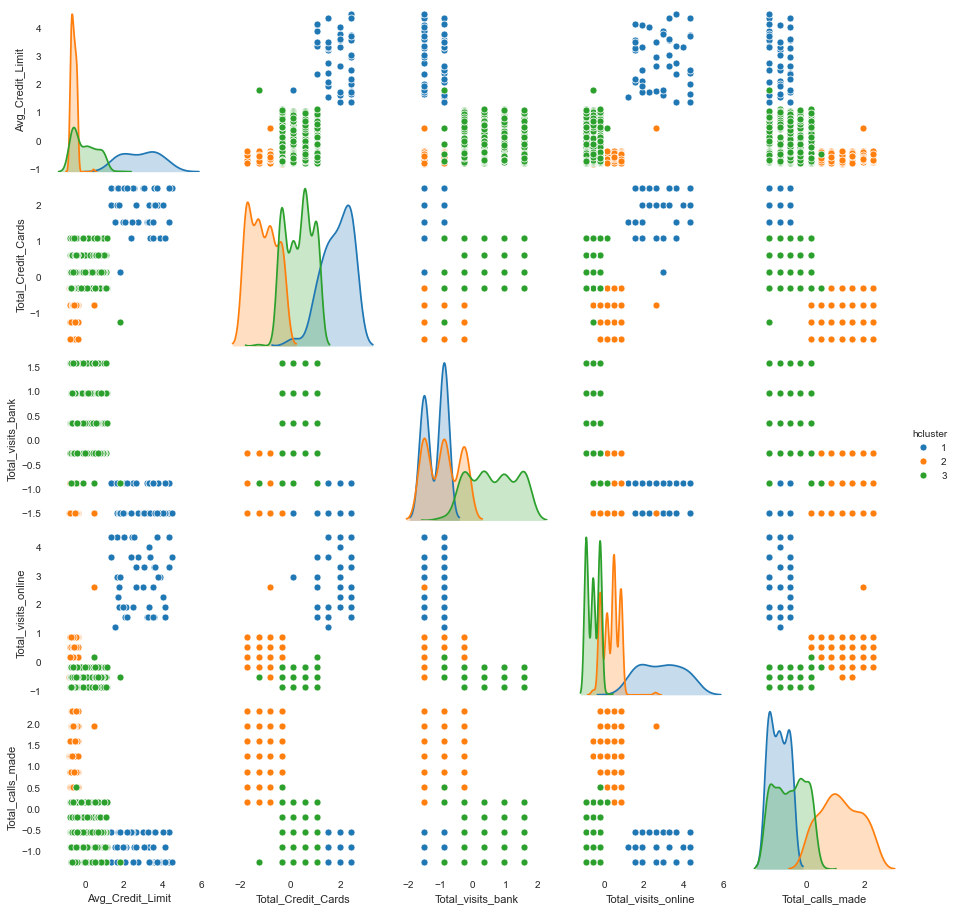

In [71]:
# Visualizing Clusters using pairplot
sns.pairplot(df_train_z, hue="hcluster")

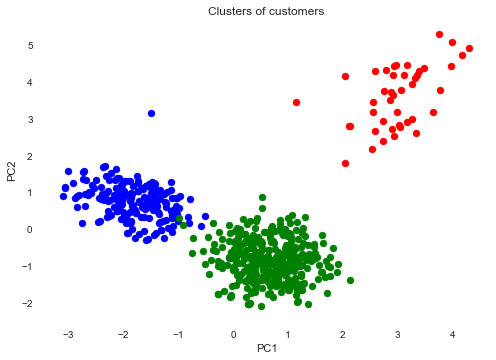

In [72]:
# Plots Clusters via PCA
plt.scatter(df_train_z_pca2[clusters == 1, 0], df_train_z_pca2[clusters == 1, 1], s = 50, c = 'red')
plt.scatter(df_train_z_pca2[clusters == 2, 0], df_train_z_pca2[clusters == 2, 1], s = 50, c = 'blue')
plt.scatter(df_train_z_pca2[clusters == 3, 0], df_train_z_pca2[clusters == 3, 1], s = 50, c = 'green')
plt.title('Clusters of customers')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [73]:
metrics.silhouette_score(df_train_z,clusters) # Close to K Means

0.5349867259731172

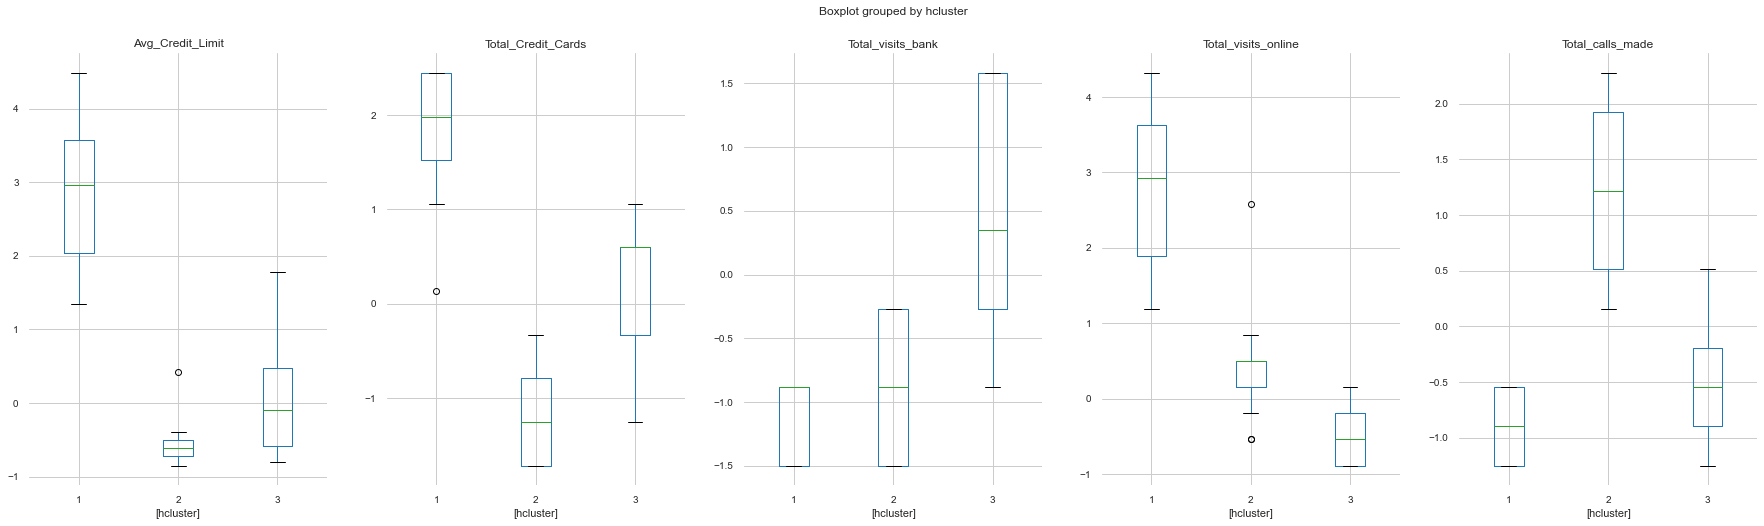

In [75]:
# Box Plot Figure to be added here
fig, axs = plt.subplots(ncols = 5, figsize = (30, 8))
df_train_z[["Avg_Credit_Limit", 'hcluster']].boxplot(by = 'hcluster',  layout=(2,4), figsize=(20, 15), ax = axs[0])
df_train_z[["Total_Credit_Cards", 'hcluster']].boxplot(by = 'hcluster',  layout=(2,4), figsize=(20, 15), ax = axs[1])
df_train_z[["Total_visits_bank", 'hcluster']].boxplot(by = 'hcluster',  layout=(2,4), figsize=(20, 15), ax = axs[2])
df_train_z[["Total_visits_online", 'hcluster']].boxplot(by = 'hcluster',  layout=(2,4), figsize=(20, 15), ax = axs[3])
df_train_z[["Total_calls_made", 'hcluster']].boxplot(by = 'hcluster',  layout=(2,4), figsize=(20, 15), ax = axs[4])
plt.show()

In [76]:
df_train_z["kcluster"] = list(df_train_labels['labels'])

In [78]:
Kmeans_results=df_train_z.drop(columns=["hcluster"]).groupby('kcluster').mean()
Kmeans_results

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
kcluster                                                            
0                -0.598333           -1.074658          -0.901115   
1                -0.016454            0.370095           0.644615   
2                 2.861600            1.877434          -1.154449   

          Total_visits_online  Total_calls_made  
kcluster                                         
0                    0.349736          1.168738  
1                   -0.545515         -0.540543  
2                    2.858780         -0.914932

In [80]:
Hierarchical_results=df_train_z.drop(columns=["kcluster"]).groupby('hcluster').mean()
Hierarchical_results

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
hcluster                                                            
1                 2.861600            1.877434          -1.154449   
2                -0.597400           -1.086255          -0.904599   
3                -0.021895            0.364174           0.633415   

          Total_visits_online  Total_calls_made  
hcluster                                         
1                    2.858780         -0.914932  
2                    0.358191          1.182584  
3                   -0.542538         -0.533606

In [81]:
df_train_z["kcluster"].value_counts().sort_index()

0    196
1    351
2     43
Name: kcluster, dtype: int64

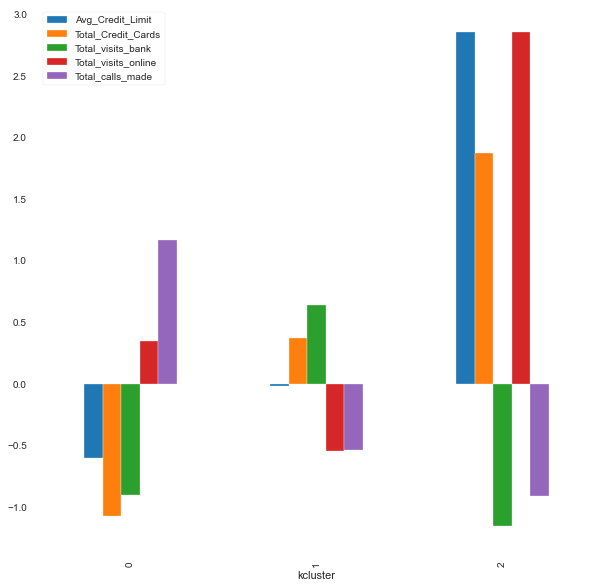

In [82]:
Kmeans_results.plot.bar(figsize=(10,10))
# Low, Medium and High Value Customers
# Recommendations based on chart below

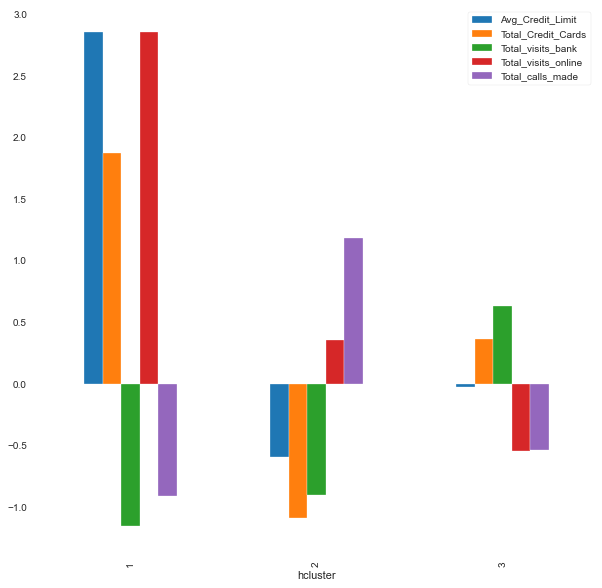

In [83]:
Hierarchical_results.plot.bar(figsize=(10,10))

# Add Clusters to Test DataSet

In [84]:
# Run on Test Dataset
df_test.shape

(65, 5)

In [85]:
df_test_z = trans.fit_transform(df_test)
df_test_z = pd.DataFrame(df_test_z,columns=df.columns)

In [86]:
df_test_z.describe().T

count          mean       std       min       25%  \
Avg_Credit_Limit      65.0  1.708035e-16  1.007782 -0.734417 -0.618550   
Total_Credit_Cards    65.0 -1.708035e-17  1.007782 -1.649813 -0.763550   
Total_visits_bank     65.0  4.099285e-17  1.007782 -1.337892 -0.716728   
Total_visits_online   65.0  6.832142e-17  1.007782 -0.926186 -0.615866   
Total_calls_made      65.0 -5.807320e-17  1.007782 -1.273953 -0.611497   

                          50%       75%       max  
Avg_Credit_Limit    -0.409990  0.192517  3.413613  
Total_Credit_Cards  -0.320418  0.565845  2.338371  
Total_visits_bank   -0.095564  0.525600  1.767928  
Total_visits_online -0.305546  0.315094  3.728614  
Total_calls_made    -0.280270  0.382186  2.038324

In [87]:
test_labels_kmeans = kmeans.predict(df_test_z)

In [88]:
metrics.silhouette_score(df_test_z, test_labels_kmeans, metric='euclidean')

0.5485055452569025

In [92]:
test_labels_hclust = hclust.fit_predict(df_test_z)

In [93]:
metrics.silhouette_score(df_test_z, test_labels_hclust, metric='euclidean')

0.5536001846834114

In [90]:
pca = PCA(n_components=2)
pca.fit(df_test_z)
df_test_z_pca2 = pca.transform(df_test_z)

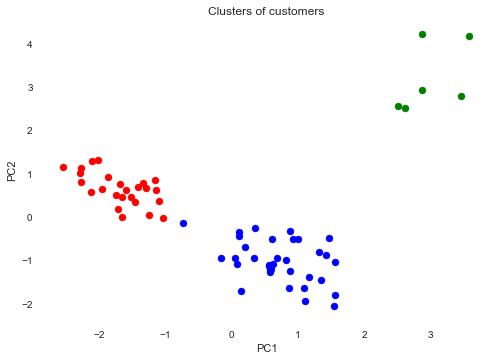

In [91]:
# Plots Clusters via PCA for Test Data Set
plt.scatter(df_test_z_pca2[test_labels_kmeans == 0, 0], df_test_z_pca2[test_labels_kmeans == 0, 1], s = 50, c = 'red')
plt.scatter(df_test_z_pca2[test_labels_kmeans == 1, 0], df_test_z_pca2[test_labels_kmeans == 1, 1], s = 50, c = 'blue')
plt.scatter(df_test_z_pca2[test_labels_kmeans == 2, 0], df_test_z_pca2[test_labels_kmeans == 2, 1], s = 50, c = 'green')
plt.title('Clusters of customers')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

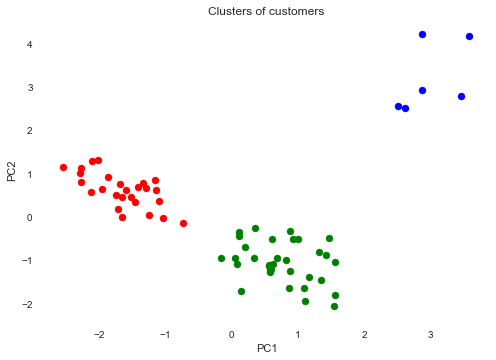

In [94]:
# Plots Clusters via PCA
plt.scatter(df_test_z_pca2[test_labels_hclust == 0, 0], df_test_z_pca2[test_labels_hclust == 0, 1], s = 50, c = 'red')
plt.scatter(df_test_z_pca2[test_labels_hclust == 1, 0], df_test_z_pca2[test_labels_hclust == 1, 1], s = 50, c = 'blue')
plt.scatter(df_test_z_pca2[test_labels_hclust == 2, 0], df_test_z_pca2[test_labels_hclust == 2, 1], s = 50, c = 'green')
plt.title('Clusters of customers')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()